In [45]:
#Import the libraries 

import pandas as pd
import numpy as np
import numpy.random as nr
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

#from keras import models
#from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

# Import the data using the file path
data = pd.read_csv('dataset_40_sonar.csv', sep=',')
print('Data shape: {}'.format(data.shape))


Data shape: (208, 61)


In [46]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 735156961850382882
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6260064256
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9727071514531464956
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [73]:
import tensorflow as tf
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

True

In [48]:
from tensorflow import keras


In [49]:
print(tf. __version__) 

2.8.0


In [50]:
print(keras.__version__)

2.8.0


In [51]:
data

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [52]:
data.dtypes

attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
                 ...   
attribute_57    float64
attribute_58    float64
attribute_59    float64
attribute_60    float64
Class            object
Length: 61, dtype: object

In [53]:
data["Class"].value_counts()


Mine    111
Rock     97
Name: Class, dtype: int64

Let us use LabelEncoder.This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column names bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only.


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])
print(data)


     attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0         0.0200       0.0371       0.0428       0.0207       0.0954   
1         0.0453       0.0523       0.0843       0.0689       0.1183   
2         0.0262       0.0582       0.1099       0.1083       0.0974   
3         0.0100       0.0171       0.0623       0.0205       0.0205   
4         0.0762       0.0666       0.0481       0.0394       0.0590   
..           ...          ...          ...          ...          ...   
203       0.0187       0.0346       0.0168       0.0177       0.0393   
204       0.0323       0.0101       0.0298       0.0564       0.0760   
205       0.0522       0.0437       0.0180       0.0292       0.0351   
206       0.0303       0.0353       0.0490       0.0608       0.0167   
207       0.0260       0.0363       0.0136       0.0272       0.0214   

     attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0         0.0986       0.1539       0.1601       0.3109  

Main challenge is to convert text/categorical data into numerical data and still make an algorithm/model to make sense out of it. Neural networks, which is a base of deep-learning, expects input values to be numerical.Now it seems to be "1" and "0". Let us check again.



In [55]:
data["Class"]


0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Class, Length: 208, dtype: int32

Now it is all int64 types, 1 and 0. 

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

Our attributes seems to be all floats and integers.

In [57]:

X = data.drop(columns=['Class'])
y = data['Class']


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)


In [66]:
#from keras import regularizers
from tensorflow.keras import Model
from keras import regularizers

# build the Artifical Neuro Network layers
network = Sequential()
network.add(Dense(120, activation='relu', input_shape=(60,)))
network.add(Dense(120, activation='relu', input_shape=(60,)))
network.add(Dense(120, activation='relu', input_shape=(60,)))
network.add(Dense(120, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network.add(Dense(1, activation='sigmoid'))

In [67]:
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 120)               7320      
                                                                 
 dense_7 (Dense)             (None, 120)               14520     
                                                                 
 dense_8 (Dense)             (None, 120)               14520     
                                                                 
 dense_9 (Dense)             (None, 120)               14520     
                                                                 
 dense_10 (Dense)            (None, 1)                 121       
                                                                 
Total params: 51,001
Trainable params: 51,001
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = network.fit(
                      X_train, y_train, validation_split=0.2, 
                      epochs=100, batch_size=4, shuffle=True,)

print()
test_loss, test_acc = network.evaluate(X_test, y_test)

print()
print('test_acc:', test_acc)

Epoch 1/100
35/35 [==============================] - 1s 21ms/step - loss: 0.7935 - accuracy: 0.5286 - val_loss: 0.7467 - val_accuracy: 0.7222
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 0.7217 - accuracy: 0.6500 - val_loss: 0.6737 - val_accuracy: 0.7222
Epoch 3/100
35/35 [==============================] - 0s 10ms/step - loss: 0.6238 - accuracy: 0.7214 - val_loss: 0.5979 - val_accuracy: 0.7778
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 0.5101 - accuracy: 0.7929 - val_loss: 0.4996 - val_accuracy: 0.7500
Epoch 5/100
35/35 [==============================] - 0s 8ms/step - loss: 0.5344 - accuracy: 0.7286 - val_loss: 0.5096 - val_accuracy: 0.8056
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 0.4788 - accuracy: 0.7643 - val_loss: 0.4599 - val_accuracy: 0.7778
Epoch 7/100
35/35 [==============================] - 0s 9ms/step - loss: 0.3966 - accuracy: 0.8286 - val_loss: 0.4207 - val_accuracy: 0.7500
Epoch 8/100

In [69]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

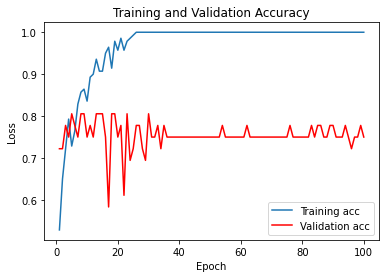

In [70]:
#To show training and Validation loss over epoch
import matplotlib.pyplot as plt

def plot_accuracy(history):
    training_acc = history.history['loss']
    validation_acc = history.history['val_loss']
    x=epochs
    plt.plot(x, acc_values, label='Training acc')
    plt.plot(x, val_acc_values,color='red', label='Validation acc')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
plot_accuracy(history)  

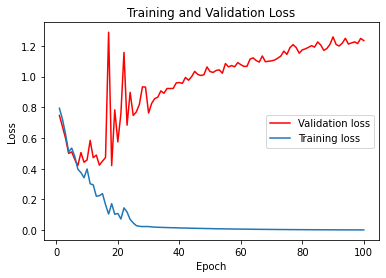

In [72]:
#To show training and Validation accuracy over epoch

def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Validation loss')
    plt.plot(x, train_loss, label='Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
plot_loss(history)  

We are able to get high accuracy with this approach with training accuracy reaching 0.84 and validation reaching 0.7.